In [3]:
import pandas as pd 

In [4]:
data = pd.read_csv('../res/regions.csv', index_col=0)

In [5]:
len(data)

9843421

In [6]:
data.isnull().sum()

taxi_id             0
time                0
lon                 0
lat                 0
is_passenger        0
speed               0
region          72967
block_id            0
dtype: int64

In [7]:
data.head()

,taxi_id,time,lon,lat,is_passenger,speed,region,block_id
0,22224,10:13:42,113.887032,22.547518,0,0,宝安区,39
1,22224,19:31:36,113.909554,22.582199,1,71,宝安区,39
2,22224,17:06:32,113.916748,22.623550,1,100,宝安区,40
3,22224,15:07:19,113.922432,22.535383,1,21,南山区,24
4,22224,14:55:18,113.922668,22.520033,1,10,南山区,27


In [8]:
# split all data with taxi id group 
grouped = data.groupby('taxi_id') 

In [9]:
# select any one id group 
group = grouped.get_group(22228) 
group 

,taxi_id,time,lon,lat,is_passenger,speed,region,block_id
4295,22228,05:08:39,113.861984,22.558783,0,0,宝安区,40
4296,22228,05:07:09,113.866798,22.563868,1,61,宝安区,40
4297,22228,05:12:25,113.870781,22.567499,0,16,宝安区,40
4298,22228,23:07:55,113.872719,22.545366,1,92,宝安区,39
4299,22228,05:06:09,113.873619,22.570534,1,66,宝安区,40
...,...,...,...,...,...,...,...,...
8757,22228,22:58:17,113.857697,22.569418,1,2,宝安区,40
8758,22228,05:09:55,113.862068,22.558317,0,40,宝安区,40
8759,22228,05:07:39,113.863968,22.560883,1,59,宝安区,40
8760,22228,05:05:39,113.875549,22.571716,1,0,宝安区,40


In [10]:
# displays all groups name 
print (grouped.groups.keys()) 
print (len(grouped.groups))

dict_keys([22224, 22228, 22231, 22236, 22240, 22241, 22242, 22243, 22251, 22265, 22267, 22269, 22270, 22276, 22282, 22284, 22286, 22291, 22292, 22295, 22299, 22304, 22307, 22310, 22311, 22313, 22314, 22315, 22317, 22321, 22323, 22329, 22334, 22336, 22338, 22345, 22346, 22348, 22350, 22352, 22355, 22360, 22369, 22379, 22380, 22381, 22386, 22389, 22391, 22392, 22396, 22406, 22408, 22414, 22423, 22425, 22430, 22431, 22433, 22446, 22455, 22456, 22458, 22464, 22466, 22470, 22472, 22481, 22493, 22494, 22498, 22505, 22506, 22507, 22508, 22513, 22515, 22516, 22517, 22525, 22528, 22529, 22533, 22535, 22536, 22541, 22543, 22550, 22551, 22560, 22562, 22563, 22565, 22584, 22589, 22590, 22598, 22604, 22605, 22607, 22608, 22610, 22618, 22620, 22622, 22624, 22629, 22635, 22640, 22646, 22649, 22654, 22655, 22657, 22669, 22670, 22674, 22679, 22694, 22704, 22705, 22707, 22708, 22710, 22711, 22714, 22716, 22735, 22736, 22737, 22738, 22739, 22745, 22750, 22757, 22758, 22759, 22760, 22765, 22771, 22772, 22

In [40]:
def parse_group(group) : 
    # parse a group info to some tracers 
    # step 1: sort by time 
    group = group.sort_values(by='time')
    results = [] 
    is_passenger = 0
    indexs = group.index 
    passengers = group['is_passenger']
    for i, p in zip(indexs, passengers) : 
        assert p == 0 or p == 1 
        if p == 1 : 
            if is_passenger == 0: 
                is_passenger = 1 
                start_index = i
                end_index = i
            else : 
                end_index = i
        else: 
            if is_passenger == 1: 
                is_passenger = 0 
                results.append((start_index, end_index))
    return results

In [42]:
group_routes = {} 
group_routes_cnt = {} 

for g in grouped.groups.keys(): 
    routes = parse_group(grouped.get_group(g)) 
    group_routes[g] = routes
    group_routes_cnt[g] = len(routes) 

In [45]:
cnts_set = list(group_routes_cnt.values()) 

In [46]:
# display the distribution of `cnts_set`, analyze the distribution of the routes 
cnts = {} 
for c in cnts_set: 
    cnts[c] = cnts.get(c, 0) + 1


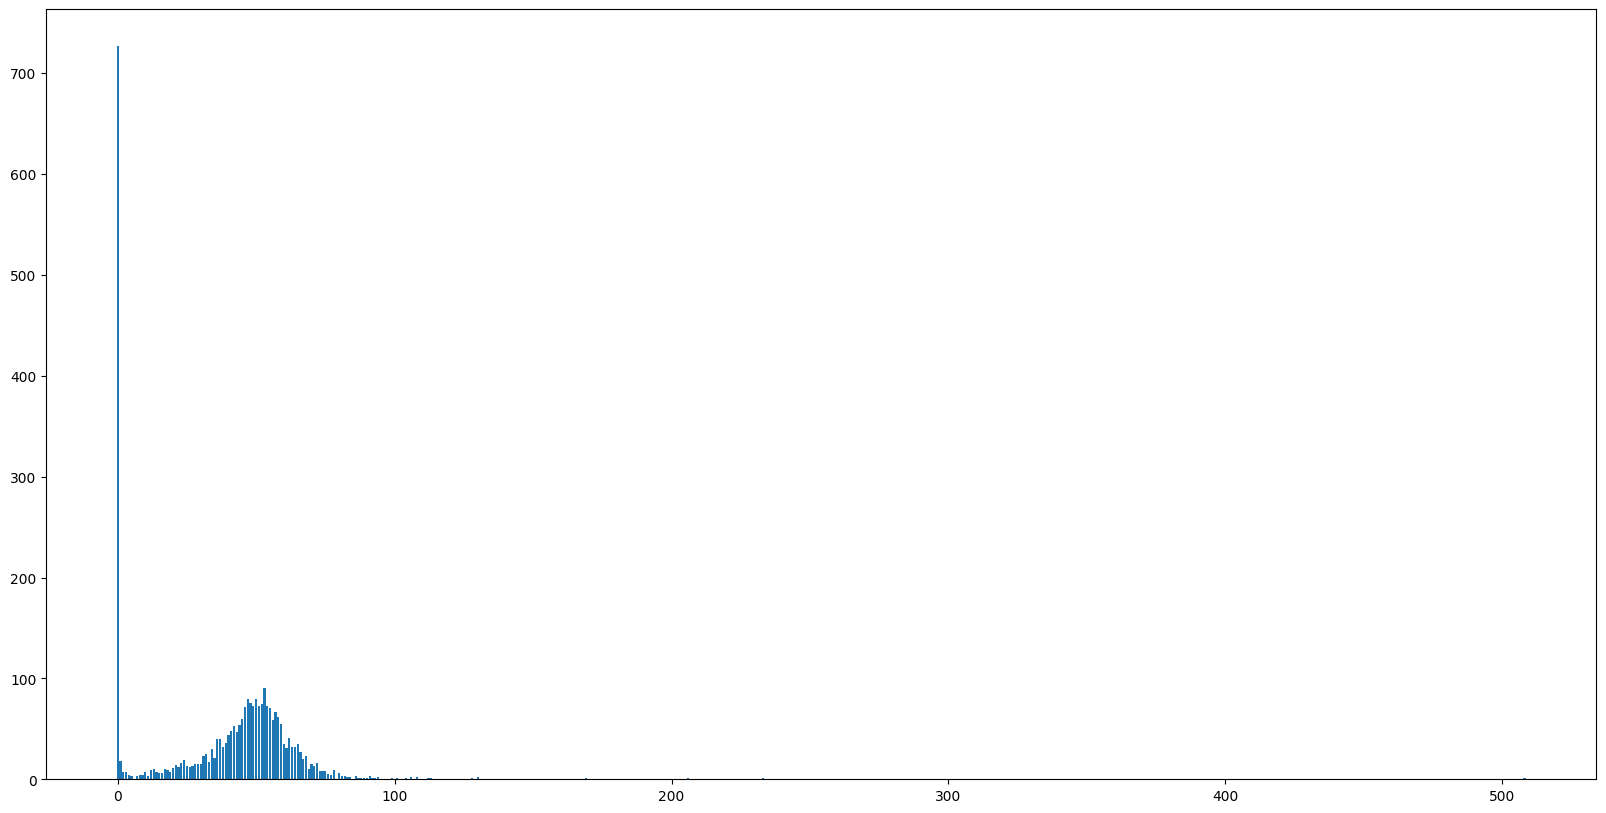

minimum:  0
maximum:  508
total  3000
zero:  727


In [51]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(20, 10)) 
plt.bar(cnts.keys(), cnts.values()) 
plt.show() 

print ('minimum: ', min(cnts_set))
print ('maximum: ', max(cnts_set)) 
print ('total ', len(cnts_set))
print ('zero: ', cnts[0])